#**Import Necessary Libraries**

In [6]:
#ImageGenerator Library
from keras.preprocessing.image import ImageDataGenerator

#Satistics and Vizualization
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Model Building
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# **Connect to Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Augmetation Section for Data Generation**

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.utils import img_to_array

In [3]:
from tensorflow.keras.utils import array_to_img, load_img

In [7]:
#Generating data with following parameters

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

In [8]:
# this is a PIL image
img = load_img("/content/drive/MyDrive/nut/bad_das/WhatsApp Image 2023-12-08 at 14.16.06.jpeg")
# this is a Numpy array with image shape
x = img_to_array(img)
x = x.reshape((1,) + x.shape)



In [10]:
#Image pixel converted to numpy arrays
print(x)

[[[[100.  95.  63.]
   [100.  95.  63.]
   [ 98.  93.  64.]
   ...
   [159. 156. 149.]
   [159. 156. 149.]
   [159. 156. 149.]]

  [[100.  95.  63.]
   [100.  95.  63.]
   [ 98.  93.  63.]
   ...
   [160. 157. 150.]
   [160. 157. 150.]
   [160. 157. 150.]]

  [[ 99.  96.  61.]
   [ 99.  96.  63.]
   [ 97.  94.  63.]
   ...
   [161. 158. 151.]
   [161. 158. 151.]
   [161. 158. 151.]]

  ...

  [[ 36.  33.  26.]
   [ 35.  32.  25.]
   [ 34.  31.  24.]
   ...
   [117. 117. 115.]
   [117. 117. 115.]
   [116. 116. 114.]]

  [[ 35.  32.  25.]
   [ 34.  31.  24.]
   [ 33.  30.  23.]
   ...
   [117. 117. 115.]
   [116. 116. 114.]
   [116. 116. 114.]]

  [[ 34.  31.  24.]
   [ 33.  30.  23.]
   [ 32.  29.  22.]
   ...
   [116. 116. 114.]
   [116. 116. 114.]
   [116. 116. 114.]]]]


In [ ]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory

i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir="/content/drive/MyDrive/DSML/mytest/good/train/good_data", save_prefix='33', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

# **Loading Training and Testing Data Sets**

In [11]:
#train and test dataset is loaded with inferred labels to each image
#each image is sclaed down to size of 256 x 256
#a batch of 16 images is created for training the model

#Training Dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/DSML/mytest/good/train",
    labels='inferred',
    label_mode = 'int',
    shuffle='True',
    batch_size=16,
    image_size=(256,256)
)

#Testing Dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/DSML/mytest/good/test",
    labels='inferred',
    label_mode = 'int',
    shuffle='True',
    batch_size=16,
    image_size=(256,256)
)


Found 1081 files belonging to 2 classes.
Found 206 files belonging to 2 classes.


In [12]:
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
#Total 68 batches and 16 images in each batch
print("Total Training Batches:",len(train_ds))

#Total 13 batches and 16 images in each batch
print("Total Testing Batches:",len(test_ds))

Total Training Batches: 68
Total Testing Batches: 13


In [16]:
import cv2

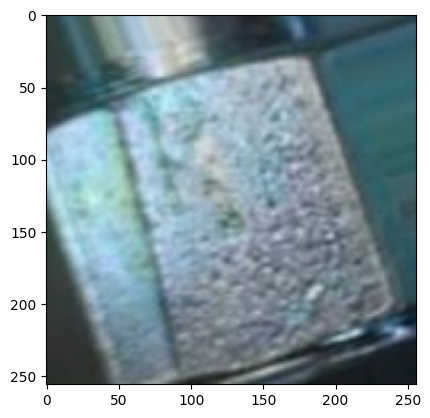

In [26]:
test_img = cv2.imread("/content/drive/MyDrive/DSML/mytest/good/train/bad/23_0_9222.jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

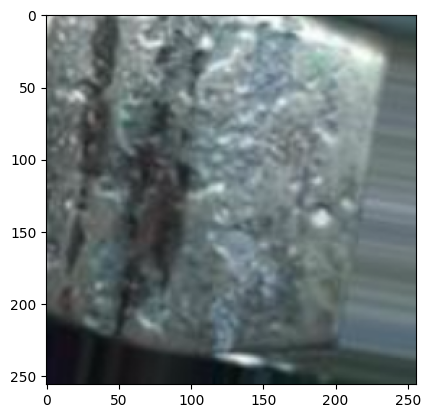

In [28]:
test_img = cv2.imread("/content/drive/MyDrive/DSML/mytest/good/train/bad/28_0_3899.jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

# **Model Building**

In [29]:
#IMport VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [30]:
#Building base model with VGG16 architecture with input size 256 x 256 x3

base_model=VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [31]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [32]:
from tensorflow.keras import layers,models

#Adding dense layers
model=models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2097216   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16814017 (64.14 MB)
Trainable params: 2099329 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [34]:
#Set the hyperparameters
#Assigning learning rate to 0.0001
#using ADAM as optimizer for the prediction

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
#compile the model
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

# **Training**

In [35]:
#We are training only on 5 epoches as VGG16 is powerful pretrained model

history = model.fit(train_ds,epochs=4,validation_data=test_ds)

Epoch 1/4
68/68 [==============================] - 128s 1s/step - loss: 0.4860 - accuracy: 0.8483 - val_loss: 0.2684 - val_accuracy: 0.9175
Epoch 2/4
68/68 [==============================] - 9s 124ms/step - loss: 0.0493 - accuracy: 0.9870 - val_loss: 0.1524 - val_accuracy: 0.9466
Epoch 3/4
68/68 [==============================] - 8s 108ms/step - loss: 0.0131 - accuracy: 0.9991 - val_loss: 0.1251 - val_accuracy: 0.9515
Epoch 4/4
68/68 [==============================] - 9s 128ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9660


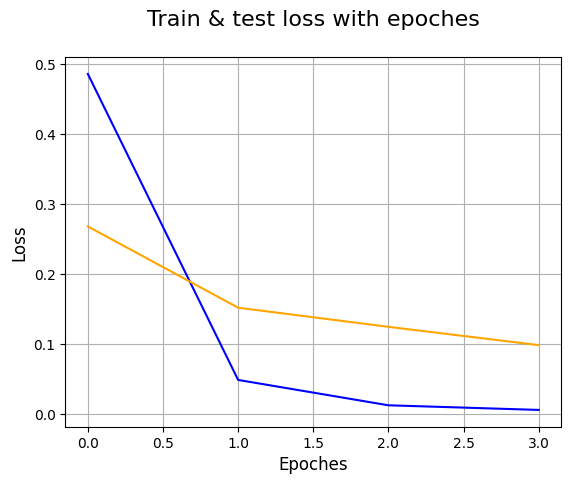

In [38]:
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='train')
plt.grid(True)

plt.title("Train & test loss with epoches\n",fontsize=16)
plt.xlabel("Epoches",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.show()

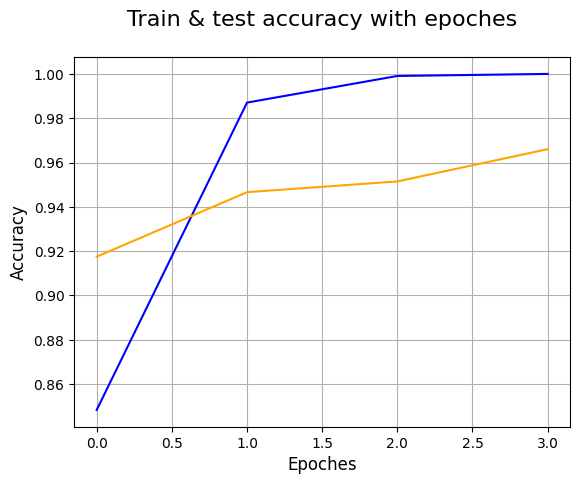

In [39]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='train')
plt.grid(True)

plt.title("Train & test accuracy with epoches\n",fontsize=16)
plt.xlabel("Epoches",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.show()

In [40]:
model.predict(test_ds)

13/13 [==============================] - 2s 89ms/step


array([[2.61118882e-09],
       [1.80556089e-01],
       [8.29203782e-05],
       [1.57035951e-09],
       [8.55206978e-04],
       [9.99690652e-01],
       [1.07386359e-06],
       [9.57669139e-01],
       [9.99864697e-01],
       [2.57210690e-03],
       [9.92915154e-01],
       [1.62503552e-02],
       [5.84072590e-01],
       [4.12323419e-03],
       [9.99981999e-01],
       [9.99349773e-01],
       [9.68359932e-02],
       [3.90781238e-08],
       [3.68885964e-01],
       [1.75757222e-02],
       [7.91776702e-02],
       [2.46429259e-08],
       [4.66718012e-03],
       [9.94898021e-01],
       [3.47470343e-02],
       [9.95837569e-01],
       [9.96319056e-01],
       [9.90400732e-01],
       [9.99503851e-01],
       [9.88890767e-01],
       [9.88690376e-01],
       [3.36086564e-03],
       [2.01056705e-09],
       [5.95590591e-01],
       [1.58654905e-06],
       [1.27397862e-03],
       [6.12187907e-02],
       [1.06110519e-07],
       [6.97092652e-01],
       [9.92378116e-01],


#**Testing**

In [41]:
import cv2

1/1 [==============================] - 1s 709ms/step
[[0.99673355]]
CLEAN SURFACE


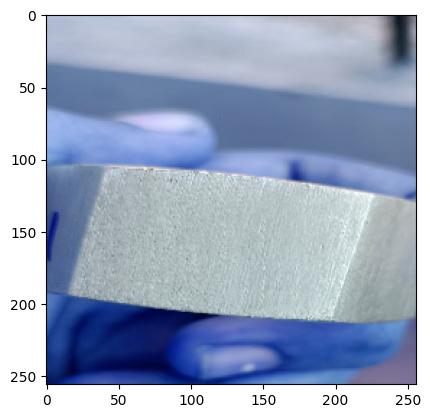

In [46]:

test_img = cv2.imread("/content/drive/MyDrive/DSML/MY_TEST/g/WhatsApp Image 2023-12-09 at 15.04.59.jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

pred_prob=model.predict(test_input)
print(pred_prob)

if pred_prob>0.5:
  print("CLEAN SURFACE")

else:print("DEFECTED SURFACE")

1/1 [==============================] - 0s 18ms/step
[[0.99988997]]
CLEAN SURFACE


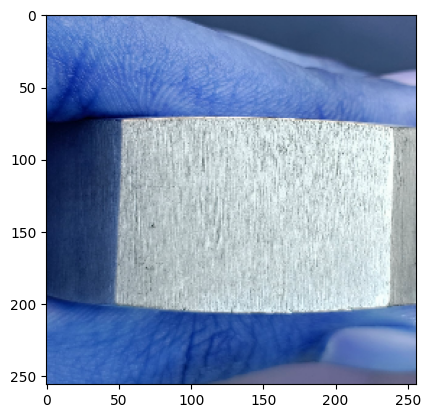

In [47]:

test_img = cv2.imread("/content/drive/MyDrive/DSML/MY_TEST/g/WhatsApp Image 2023-12-09 at 15.13.35.jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

pred_prob=model.predict(test_input)
print(pred_prob)

if pred_prob>0.5:
  print("CLEAN SURFACE")

else:print("DEFECTED SURFACE")

1/1 [==============================] - 0s 22ms/step
[[0.9999999]]
CLEAN SURFACE


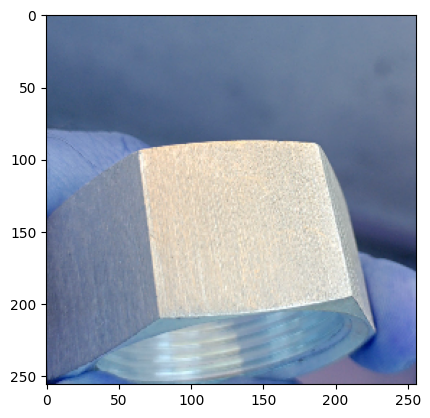

In [48]:

test_img = cv2.imread("/content/drive/MyDrive/DSML/MY_TEST/g/WhatsApp Image 2023-12-09 at 15.25.43 (1).jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

pred_prob=model.predict(test_input)
print(pred_prob)

if pred_prob>0.5:
  print("CLEAN SURFACE")

else:print("DEFECTED SURFACE")

1/1 [==============================] - 0s 21ms/step
[[0.37852344]]
DEFECTED SURFACE


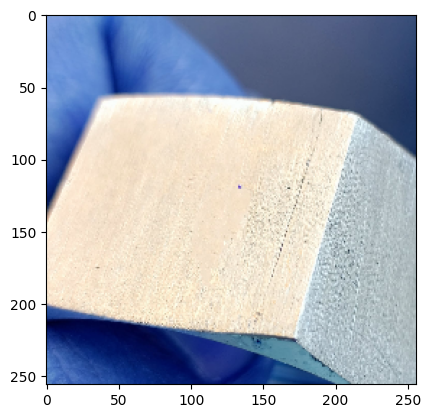

In [49]:

test_img = cv2.imread("/content/drive/MyDrive/DSML/MY_TEST/b/WhatsApp Image 2023-12-09 at 15.20.35 (1).jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

pred_prob=model.predict(test_input)
print(pred_prob)

if pred_prob>0.5:
  print("CLEAN SURFACE")

else:print("DEFECTED SURFACE")

1/1 [==============================] - 0s 18ms/step
[[5.442627e-05]]
DEFECTED SURFACE


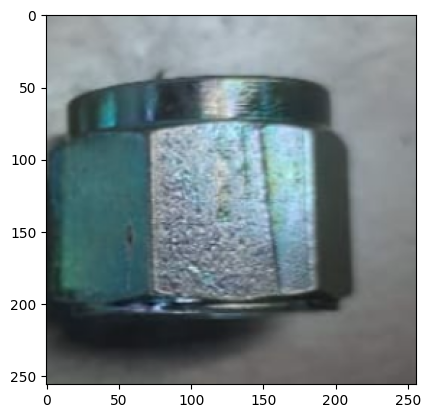

In [53]:

test_img = cv2.imread("/content/drive/MyDrive/DSML/MY_TEST/b/WhatsApp Image 2023-12-09 at 16.46.27.jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

pred_prob=model.predict(test_input)
print(pred_prob)

if pred_prob>0.5:
  print("CLEAN SURFACE")

else:print("DEFECTED SURFACE")

1/1 [==============================] - 0s 32ms/step
[[0.05237258]]
DEFECTED SURFACE


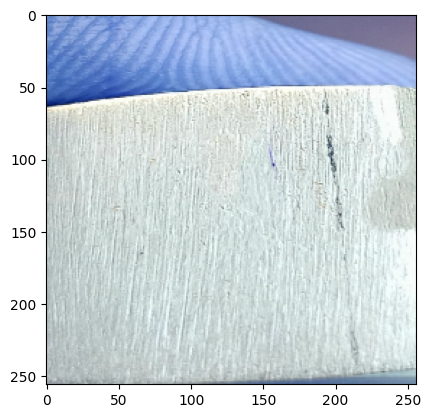

In [55]:

test_img = cv2.imread("/content/drive/MyDrive/DSML/MY_TEST/b/WhatsApp Image 2023-12-09 at 17.01.56.jpeg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)

pred_prob=model.predict(test_input)
print(pred_prob)

if pred_prob>0.5:
  print("CLEAN SURFACE")

else:print("DEFECTED SURFACE")